In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

In [2]:
data = np.loadtxt("ledvice.dat")
x,y, yerr = data[:,0]/data[:,0].max(), data[:,1]/data[:,1].max(), np.sqrt(data[:,1])/data[:,1].max()

In [28]:
!head ledvice.dat

#t[čas]	N[sunkov na detektorju]
0	13753
80	10426
160	8268
240	7416
320	6557
400	5745
480	5257
560	4690
640	4472


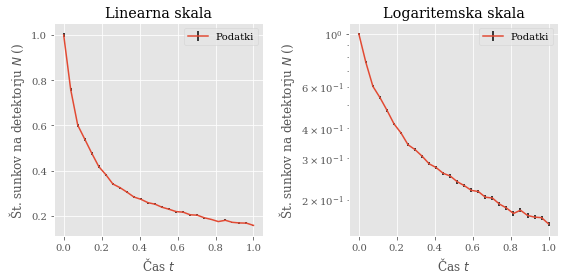

In [3]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("Linearna skala")

plt.errorbar(x,y,yerr=yerr, ecolor="k", label="Podatki")
plt.legend(loc="upper right")
plt.xlabel(r"Čas $t$")
plt.ylabel(r"Št. sunkov na detektorju $N$ ()")


plt.subplot(122)
plt.title("Logaritemska skala")
plt.errorbar(x,y,yerr=yerr, ecolor="k", label="Podatki")
plt.legend(loc="upper right")
plt.xlabel(r"Čas $t$")
plt.ylabel(r"Št. sunkov na detektorju $N$ ()")
plt.semilogy()
plt.tight_layout(h_pad=1.05)

#plt.savefig("2-1-originalni-podatki.pdf")
#plt.savefig("2-1-originalni-podatki.jpg")
plt.show()

In [63]:
popt, pcov = curve_fit(modelske_funkcije[1], x,y,sigma=yerr)
kormat(pcov)

array([[ 1.        , -0.07042439, -1.        , -0.10707067],
       [-0.06983536,  1.        ,  0.06983534,  0.99931233],
       [-1.        ,  0.07042437,  1.        ,  0.10707065],
       [-0.10648357,  0.99933405,  0.10648355,  1.        ]])

*****FItam model: eksponentna
     ******POPT: 
    [0.64673147 0.57164959]
     ******PCOV: 
    \left[ \begin{array}{cc}
    1.02e-05&-9.61e-06\\\

-9.61e-06&1.38e-05\end{array} \right] 
     ******korelacijska matrika:
    \left[ \begin{array}{cc}
    1.0&-0.809\\\

-0.809&1.0\end{array} \right] 
     ******reduciran Hi-kvadrat:
    \chi^2_\mathrm{red.} = 2029.266
     ******Rišem ........


*****FItam model: dvojna_eksponentna
     ******POPT: 
    [ 1.16097471  0.57163742 -0.51424134  0.57162522]
     ******PCOV: 
    \left[ \begin{array}{cccc}
    2.8e+10&-1.16e+06&-2.8e+10&-4e+06\\\

-1.15e+06&9.73e+03&1.15e+06&2.2e+04\\\

-2.8e+10&1.16e+06&2.8e+10&4e+06\\\

-3.98e+06&2.2e+04&3.98e+06&4.99e+04\end{array} \right] 
     ******korelacijska matrika:
    \left[ \begin{array}{cccc}
    1.0&-0.0704&-1.0&-0.107\\\

-0.0698&1.0&0.0698&0.999\\\

-1.0&0.0704&1.0&0.107\\\

-0.106&0.999&0.106&1.0\end{array} \right] 
     ******reduciran Hi-kvadrat:
    \chi^2_\mathrm{red.} = 1014.633
     **

/home/peter/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in power
/home/peter/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


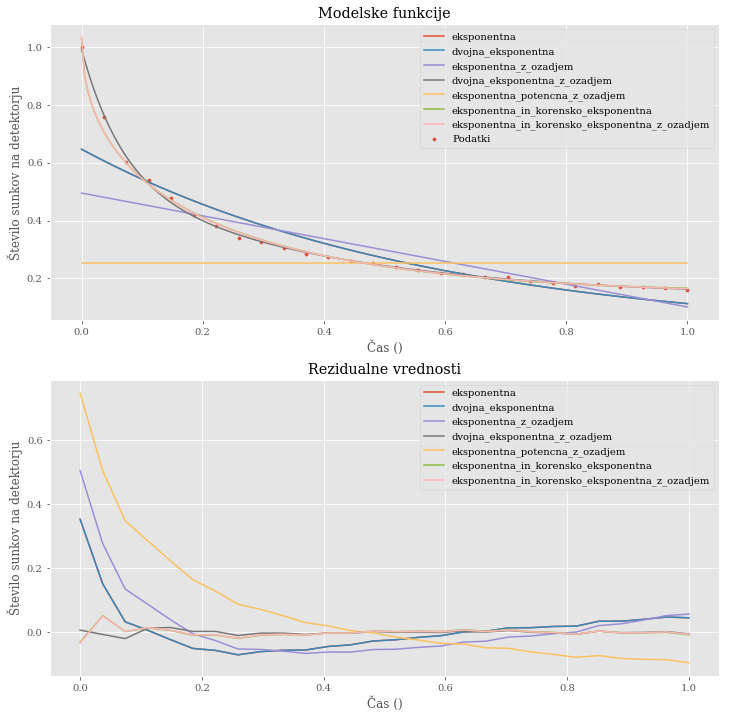

In [6]:
def hikvadrat(yi, xi, model,  sigme, *args,reduced=True):
    assert isinstance(sigme, int) or len(sigme) == len(yi), "Dimenzija napak ne štima! (oblika bodi 1 ali yi.shape)"
    assert yi.shape == xi.shape, "Dimenzije y_i in x_i ne štimajo! (xi.shape != yi.shape)"
    
    if reduced:
        return np.sum((yi - model(xi, *args))**2/sigme**2)/len(args)
    else:
        return np.sum((yi - model(xi, *args))**2/sigme**2)
def kormat(C):
    from numpy.linalg import inv
    D=np.zeros(C.shape)
    np.fill_diagonal(D, np.diag(C))
    D = np.sqrt(D)
    return inv(D) @ C @ inv(D)

def eksponentna(x,A,tau):
    return A*np.exp(-x/tau)
def dvojna_eksponentna(x, A,tau1, B, tau2):
    return A*np.exp(-x/tau1)+B*np.exp(-x/tau2)
def eksponentna_z_ozadjem(x,A,tau,ozadje):
    return A*np.exp(-x/tau)+ozadje
def dvojna_eksponentna_z_ozadjem(x, A,tau1, B, tau2, ozadje):
    return A*np.exp(-x/tau1)+B*np.exp(-x/tau2)+ozadje
def eksponentna_potencna_z_ozadjem(x,A,tau,p,ozadje):
    return A*np.exp(-(x/tau)**p)+ozadje
def eksponentna_in_korensko_eksponentna(x, A, tau1, B, tau2):
    return A*np.exp(-x/tau1)+B*np.exp(-np.sqrt(x)/tau2)
def eksponentna_in_korensko_eksponentna_z_ozadjem(x, A, tau1, B, tau2, ozadje):
    return A*np.exp(-x/tau1)+B*np.exp(-np.sqrt(x)/tau2)+ozadje
    
modelske_funkcije=[eksponentna, dvojna_eksponentna, eksponentna_z_ozadjem, dvojna_eksponentna_z_ozadjem, 
                   eksponentna_potencna_z_ozadjem, eksponentna_in_korensko_eksponentna, 
                   eksponentna_in_korensko_eksponentna_z_ozadjem]
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Modelske funkcije")
plt.xlabel("Čas ()")
plt.ylabel("Število sunkov na detektorju")
plt.scatter(x,y,label="Podatki", s=10)
plt.legend()

plt.subplot(212)
plt.title("Rezidualne vrednosti")
plt.xlabel("Čas ()")
plt.ylabel("Število sunkov na detektorju")


razpon = np.linspace(x.min(), x.max(), 200)
for model in modelske_funkcije:
    print("*****FItam model:", model.__name__)
    popt, pcov = curve_fit(model, x,y,sigma=yerr, method="lm", absolute_sigma=True)
    print("     ******POPT: ", popt, sep="\n    ")
    print("     ******PCOV: ", array_to_latex_matrix(pcov), sep="\n    ")
    print("     ******korelacijska matrika:", array_to_latex_matrix(kormat(pcov)), sep="\n    ")
    print("     ******reduciran Hi-kvadrat:",r"\chi^2_\mathrm{{red.}} = {:.3f}".format(hikvadrat(y,x,model, yerr, *popt)), sep="\n    ")
    print("     ******Rišem ........\n\n")
    plt.subplot(211)
    plt.plot(razpon, model(razpon, *popt), label=model.__name__)
    plt.subplot(212)
    plt.plot(x, y-model(x, *popt), label=model.__name__)

plt.subplot(211)
plt.legend()
plt.subplot(212)
plt.legend()
#plt.savefig("2-2-razni-fiti.pdf")
#plt.savefig("2-2-razni-fiti.jpg")    
plt.show()

In [5]:
def array_to_latex_matrix(arej):
    vrstic = len(arej)
    stolpcev = len(arej[0])
    zacetek =r"""\left[ \begin{{array}}{{{cji}}}
    """.format(cji="c"*stolpcev)
    konec = r"""\end{array} \right] """
    
    vsebina= ""
    for i in range(vrstic):
        for j in range(stolpcev):
            vsebina = vsebina + "{:.3}".format(arej[i][j])
            if not j==stolpcev-1:
                vsebina += r"&"
        if not i == vrstic-1:
            vsebina = vsebina+r"""\\\

"""
    return zacetek + vsebina+ konec

In [8]:
def eksponentna(x,A,tau):
    return A*np.exp(-x/tau)
def dvojna_eksponentna(x, A,tau1, B, tau2):
    return A*np.exp(-x/tau1)+B*np.exp(-x/tau2)
def eksponentna_z_ozadjem(x,A,tau,ozadje):
    return A*np.exp(-x/tau)+ozadje
def dvojna_eksponentna_z_ozadjem(x, A,tau1, B, tau2, ozadje):
    return A*np.exp(-x/tau1)+B*np.exp(-x/tau2)+ozadje
def eksponentna_potencna_z_ozadjem(x,A,tau,p,ozadje):
    return A*np.exp(-(x/tau)**p)+ozadje
def eksponentna_in_korensko_eksponentna(x, A, tau1, B, tau2):
    return A*np.exp(-x/tau1)+B*np.exp(-np.sqrt(x)/tau2)
def eksponentna_in_korensko_eksponentna_z_ozadjem(x, A, tau1, B, tau2, ozadje):
    return A*np.exp(-x/tau1)+B*np.exp(-np.sqrt(x)/tau2)+ozadje

def fitaj(model, p0):
    plt.figure(figsize=(12,12))
    plt.subplot(211)
    plt.title("Modelske funkcije")
    plt.xlabel("Čas ()")
    plt.ylabel("Število sunkov na detektorju")
    plt.scatter(x,y,label="Podatki", s=10)
    plt.legend()

    plt.subplot(212)
    plt.title("Rezidualne vrednosti")
    plt.xlabel("Čas ()")
    plt.ylabel("Število sunkov na detektorju")


    razpon = np.linspace(x.min(), x.max(), 200)

    print("*****FItam model:", model.__name__)
    popt, pcov = curve_fit(model, x,y,sigma=yerr, method="lm", absolute_sigma=True, p0=p0)
    print("     ******POPT: ", popt, sep="\n    ")
    print("     ******PCOV: ", array_to_latex_matrix(pcov), sep="\n    ")
    print("     ******korelacijska matrika:", array_to_latex_matrix(kormat(pcov)), sep="\n    ")
    print("     ******reduciran Hi-kvadrat:",r"\chi^2_\mathrm{{red.}} = {:.3f}".format(hikvadrat(y,x,model, yerr, *popt)), sep="\n    ")
    print("     ******Rišem ........\n\n")
    plt.subplot(211)
    plt.plot(razpon, model(razpon, *popt), label=model.__name__)
    plt.subplot(212)
    plt.plot(x, y-model(x, *popt), label=model.__name__)

    plt.subplot(211)
    plt.legend()
    plt.subplot(212)
    plt.legend()
    #plt.savefig("2-2-razni-fiti.pdf")
    #plt.savefig("2-2-razni-fiti.jpg")    
    plt.show()

eksponentna, dvojna_eksponentna, eksponentna_z_ozadjem, dvojna_eksponentna_z_ozadjem, 
                   eksponentna_potencna_z_ozadjem, eksponentna_in_korensko_eksponentna, 
                   eksponentna_in_korensko_eksponentna_z_ozadjem


*****FItam model: eksponentna
     ******POPT: 
    [0.64673147 0.57164959]
     ******PCOV: 
    \left[ \begin{array}{cc}
    1.02e-05&-9.61e-06\\\

-9.61e-06&1.38e-05\end{array} \right] 
     ******korelacijska matrika:
    \left[ \begin{array}{cc}
    1.0&-0.809\\\

-0.809&1.0\end{array} \right] 
     ******reduciran Hi-kvadrat:
    \chi^2_\mathrm{red.} = 2029.266
     ******Rišem ........




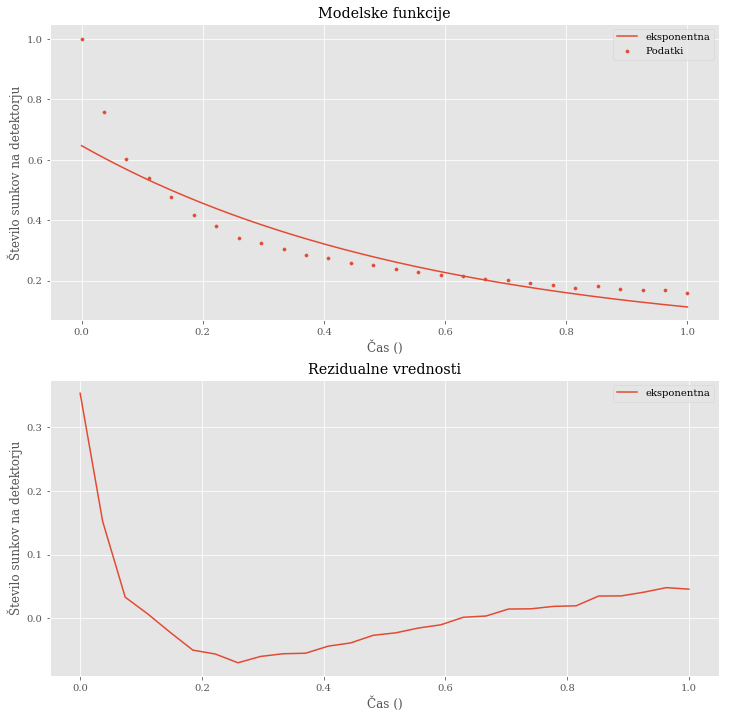

In [39]:
fitaj(eksponentna,p0=[1,1])

In [32]:
slovar_parametrov= dict(
    eksponentna=[0.6, 0.57],
    dvojna_eksponentna=[0.59456958, 0.09741286, 0.38037372, 1.11060453],
    eksponentna_z_ozadjem=[0.71464855, 0.18486063, 0.17728857],
    dvojna_eksponentna_z_ozadjem=[0.4432, 0.0665, 0.4155, 0.3738, 0.1339 ], 
    eksponentna_potencna_z_ozadjem=[0.87274326, 0.15981841, 0.66086386, 0.13518254],
    eksponentna_in_korensko_eksponentna=[0.36138267, 0.10954628, 0.63947151, 0.71895297],
    eksponentna_in_korensko_eksponentna_z_ozadjem=[0.35788149, 0.11005208, 0.63932613, 0.70640701, 0.00406244]

)
slovar_parametrov

{'eksponentna': [0.6, 0.57],
 'dvojna_eksponentna': [0.59456958, 0.09741286, 0.38037372, 1.11060453],
 'eksponentna_z_ozadjem': [0.71464855, 0.18486063, 0.17728857],
 'dvojna_eksponentna_z_ozadjem': [0.4432, 0.0665, 0.4155, 0.3738, 0.1339],
 'eksponentna_potencna_z_ozadjem': [0.87274326,
  0.15981841,
  0.66086386,
  0.13518254],
 'eksponentna_in_korensko_eksponentna': [0.36138267,
  0.10954628,
  0.63947151,
  0.71895297],
 'eksponentna_in_korensko_eksponentna_z_ozadjem': [0.35788149,
  0.11005208,
  0.63932613,
  0.70640701,
  0.00406244]}

*****FItam model: eksponentna
*****FItam model: dvojna_eksponentna
*****FItam model: eksponentna_z_ozadjem
*****FItam model: dvojna_eksponentna_z_ozadjem
*****FItam model: eksponentna_potencna_z_ozadjem
*****FItam model: eksponentna_in_korensko_eksponentna
*****FItam model: eksponentna_in_korensko_eksponentna_z_ozadjem


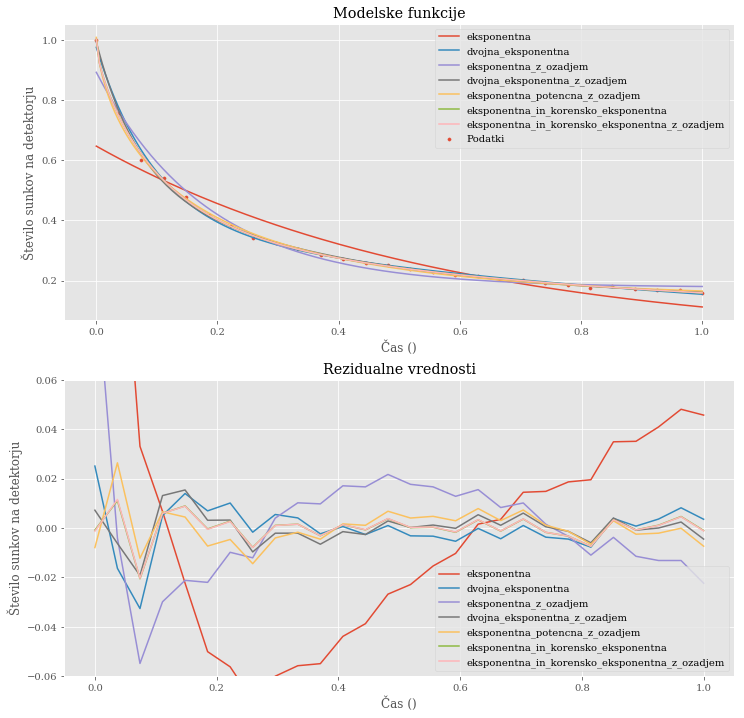

In [38]:
def hikvadrat(yi, xi, model,  sigme, *args,reduced=True):
    assert isinstance(sigme, int) or len(sigme) == len(yi), "Dimenzija napak ne štima! (oblika bodi 1 ali yi.shape)"
    assert yi.shape == xi.shape, "Dimenzije y_i in x_i ne štimajo! (xi.shape != yi.shape)"
    
    if reduced:
        return np.sum((yi - model(xi, *args))**2/sigme**2)/len(args)
    else:
        return np.sum((yi - model(xi, *args))**2/sigme**2)
def kormat(C):
    from numpy.linalg import inv
    D=np.zeros(C.shape)
    np.fill_diagonal(D, np.diag(C))
    D = np.sqrt(D)
    return inv(D) @ C @ inv(D)

def eksponentna(x,A,tau):
    return A*np.exp(-x/tau)
def dvojna_eksponentna(x, A,tau1, B, tau2):
    return A*np.exp(-x/tau1)+B*np.exp(-x/tau2)
def eksponentna_z_ozadjem(x,A,tau,ozadje):
    return A*np.exp(-x/tau)+ozadje
def dvojna_eksponentna_z_ozadjem(x, A,tau1, B, tau2, ozadje):
    return A*np.exp(-x/tau1)+B*np.exp(-x/tau2)+ozadje
def eksponentna_potencna_z_ozadjem(x,A,tau,p,ozadje):
    return A*np.exp(-(x/tau)**p)+ozadje
def eksponentna_in_korensko_eksponentna(x, A, tau1, B, tau2):
    return A*np.exp(-x/tau1)+B*np.exp(-np.sqrt(x)/tau2)
def eksponentna_in_korensko_eksponentna_z_ozadjem(x, A, tau1, B, tau2, ozadje):
    return A*np.exp(-x/tau1)+B*np.exp(-np.sqrt(x)/tau2)+ozadje
    
modelske_funkcije=[eksponentna,dvojna_eksponentna, eksponentna_z_ozadjem, dvojna_eksponentna_z_ozadjem, 
                   eksponentna_potencna_z_ozadjem, eksponentna_in_korensko_eksponentna, 
                   eksponentna_in_korensko_eksponentna_z_ozadjem]
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.title("Modelske funkcije")
plt.xlabel("Čas ()")
plt.ylabel("Število sunkov na detektorju")
plt.scatter(x,y,label="Podatki", s=10)
plt.legend()

plt.subplot(212)
plt.title("Rezidualne vrednosti")
plt.xlabel("Čas ()")
plt.ylabel("Število sunkov na detektorju")


razpon = np.linspace(x.min(), x.max(), 200)
for model in modelske_funkcije:
    print("*****FItam model:", model.__name__)
    popt, pcov = curve_fit(model, x,y,sigma=yerr, method="lm", absolute_sigma=True, p0=slovar_parametrov[model.__name__])
    #print("     ******POPT: ", popt, sep="\n    ")
   # print("     ******PCOV: ", array_to_latex_matrix(pcov), sep="\n    ")
   # print("     ******korelacijska matrika:", array_to_latex_matrix(kormat(pcov)), sep="\n    ")
   # print("     ******reduciran Hi-kvadrat:",r"\chi^2_\mathrm{{red.}} = {:.3f}".format(hikvadrat(y,x,model, yerr, *popt)), sep="\n    ")
   # print("     ******Rišem ........\n\n")
    plt.subplot(211)
    plt.plot(razpon, model(razpon, *popt), label=model.__name__)
    plt.subplot(212)
    plt.plot(x, y-model(x, *popt), label=model.__name__)

plt.subplot(211)

plt.legend()
plt.subplot(212)
plt.ylim((-0.06, 0.06))
plt.legend()
#plt.savefig("2-3-izboljsani-fiti.pdf")
#plt.savefig("2-3-izboljsani-fiti.jpg")    
plt.show()